### Fraud Detection 

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [26]:
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")



### Explain

In [27]:
df = pd.read_csv("AIML_Dataset.csv")

In [28]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [30]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [31]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [32]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [33]:
df.isnull().sum() # no missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [34]:
# Percentage of frauds
df["isFraud"].value_counts(normalize=True) * 100
# Data imbalance

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

In [35]:
### Importing Necessary Libraries
We import libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and warnings suppression. Additionally, we set a consistent theme for visualizations using Seaborn.

---

### Loading the Dataset
We load the dataset `AIML_Dataset.csv` into a pandas DataFrame named `df`.

---

### Displaying the First Few Rows
We use `df.head()` to display the first few rows of the dataset to understand its structure and content.

---

### Dataset Summary
Using `df.info()`, we display a concise summary of the dataset, including column data types and non-null counts.

---

### Listing Column Names
We list all column names in the dataset using `df.columns`.

---

### Distribution of Fraudulent Transactions
We check the distribution of the `isFraud` column using `df["isFraud"].value_counts()` to understand the number of fraudulent transactions.

---

### Distribution of Flagged Transactions
We check the distribution of the `isFlaggedFraud` column using `df["isFlaggedFraud"].value_counts()` to understand flagged transactions.

---

### Checking for Missing Values
We use `df.isnull().sum()` to check for missing values in the dataset and ensure data completeness.

---

### Percentage of Fraudulent Transactions
We calculate the percentage of fraudulent transactions using `df["isFraud"].value_counts(normalize=True) * 100` to understand data imbalance.

SyntaxError: invalid syntax (2575861542.py, line 2)

In [ ]:
# visualize data about fraud



Text(0, 0.5, 'Count')

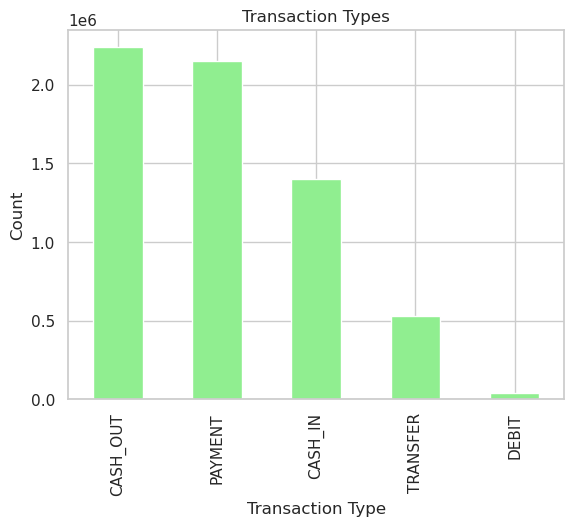

In [13]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="lightgreen")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

In [ ]:
## Fraud by type

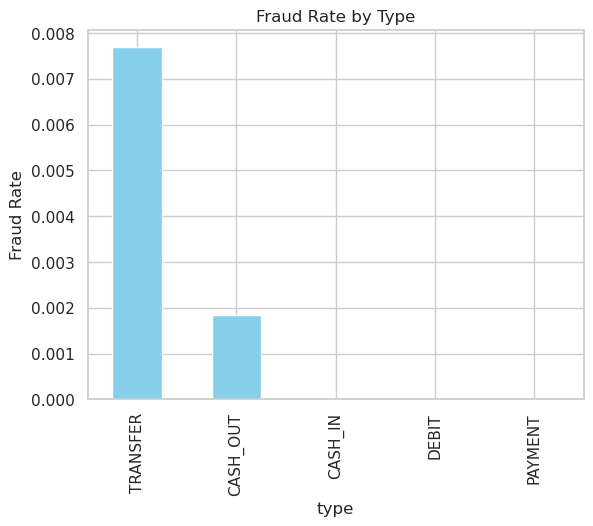

In [14]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type",color="skyblue")
plt.ylabel("Fraud Rate")
plt.show()

In [ ]:
```markdown
### Fraud Amount Analysis
We analyze the `amount` column to understand the distribution of transaction amounts. First, we use `describe()` to get summary statistics of the `amount` column. Then, we visualize the log-transformed transaction amounts using a histogram with a kernel density estimate (KDE) for better visualization of the distribution.
```

In [15]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

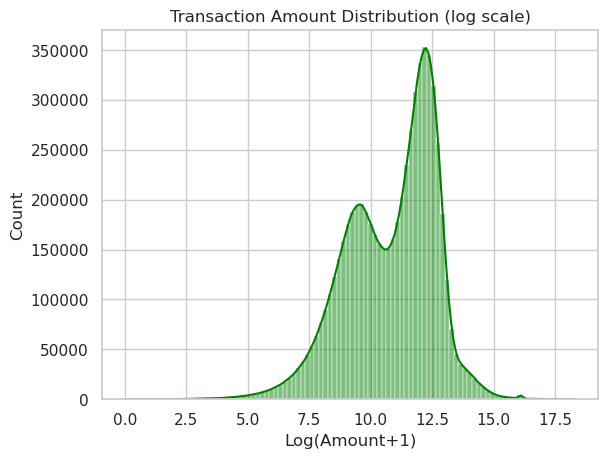

In [17]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount+1)")
plt.show()



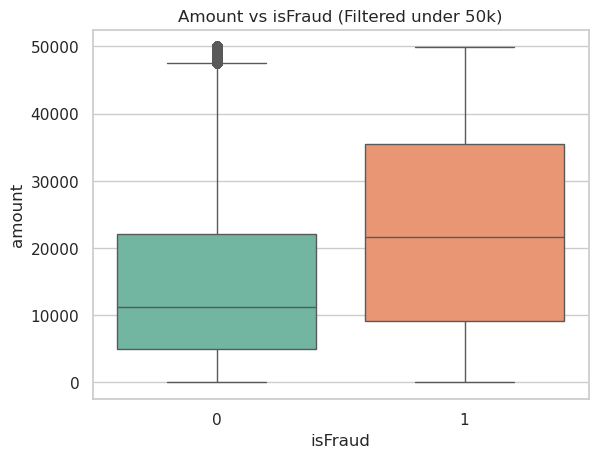

In [18]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount", palette="Set2")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [19]:
# Balance and Anomaily Detection
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [21]:
(df["balanceDiffOrig"] < 0).sum()

1399253

In [22]:
(df["balanceDiffDest"] < 0).sum()

1238864

In [23]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


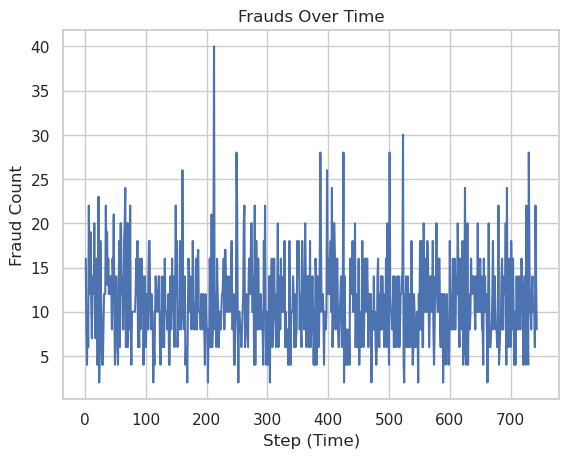

In [37]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = "Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Fraud Count")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [38]:
df.drop(columns="step", inplace=True) # drop step column

In [39]:
df.head(2)


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0


In [40]:
top_senders = df["nameOrig"].value_counts().head(10)

In [41]:
top_receivers = df["nameDest"].value_counts().head(10)

In [44]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [47]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

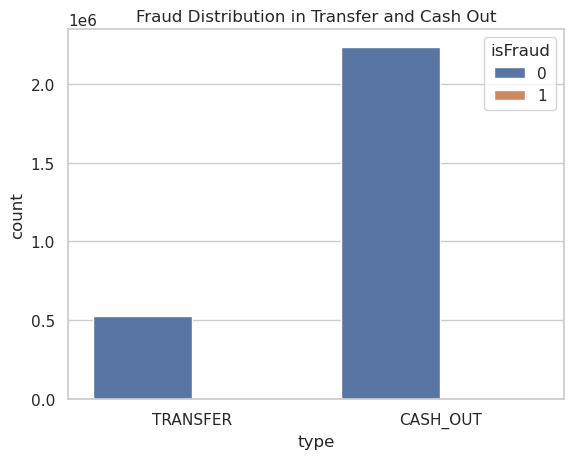

In [49]:
## Fraud distribution in transfer and cash out
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash Out")
plt.show()
# Cash out dominates the charts

In [55]:
## Correlation
corr=df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


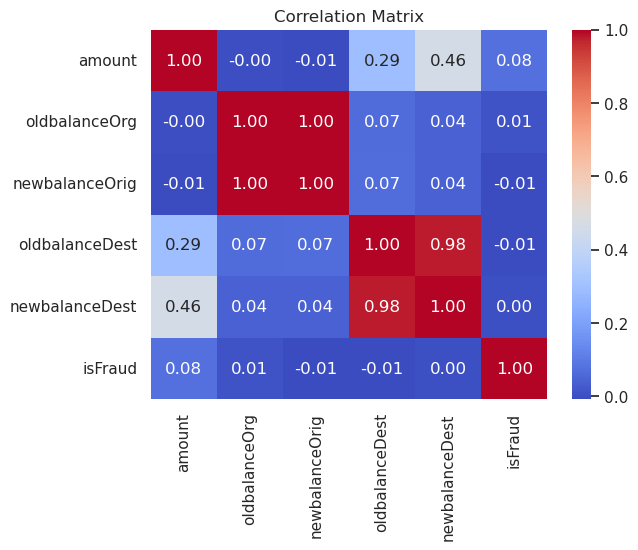

In [56]:
# Visualise the correlation
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix") 
plt.show()

In [ ]:
#